In [ ]:
import numpy as np

# Question 1

In [ ]:
# Q1: set  j & k
j = 24000
k = 6000
num_samples = j+k

# draw random numbers for every feature
x_1 = np.random.uniform(low=18., high=80., size=(num_samples, 1))               #age
x_2 = np.random.uniform(low=1., high=15., size=(num_samples, 1))                #income (thousands)
x_3 = np.float32(np.random.uniform(low=0., high=1., size=(num_samples, 1)) < .1)#self-employed or employed

X = np.concatenate([x_1, x_2, x_3], axis=1)

# Q1: Compute the empirical means of of each feature
x_J = X[:j, :]
mean_x_J = np.mean(x_J, axis=0)
mean_x_J

array([48.97453624,  7.98313358,  0.101875  ])

**Credit History:** Credit history includes a person's track record with loans, credit card payments, and other forms of credit. This history shows how reliably a person has managed their financial obligations. A strong credit history, marked by timely payments and responsible credit management, suggests a lower risk for lenders, as it indicates the borrower is likely to continue this pattern. On the other hand, a poor credit history, with instances of late payments or defaults, points to a higher risk.

**Debt-to-Income Ratio:** This ratio compares a person's total monthly debt payments to their gross monthly income. A high debt-to-income ratio means a significant part of the borrower's income is tied up in debt repayments, which could make it challenging to handle additional debt. Lenders prefer a lower ratio, as it suggests that the borrower has more financial breathing room to accommodate new loan payments.

# Question 2

## Question 2a)

In [ ]:
# a)

sigmoid = lambda x: 1. / (1. + np.exp(-x))

# set parameters a_0, a_1, a_2, a_3
# non-linear model
a_0 = -1
a_1 = -2
a_2 = 0.25
a_3 = 4

p = sigmoid(a_0 + a_1 * np.abs(x_1 - 50) + a_2 * np.power(x_2, 1.25) + a_3 * x_3)
y = np.float32(np.squeeze(np.random.uniform(size=(num_samples, 1)) < p))
print("Non-linear model: default rate {:.2f}%".format(np.mean(p) * 100.))
a_0, a_1, a_2, a_3

Non-linear model: default rate 5.08%


(-1, -2, 0.25, 4)

## Question 2b)

In [ ]:
# b) learn with logistic regression

# fit on the training data with logistic regression
from sklearn.linear_model import LogisticRegression

# divide dataset into training dataset and test dataset
X_train_1 = X[:j, :]
X_test_1 = X[j:, :]
y_train_1 = y[:j]
y_test_1 = y[j:]
p_test_1 = p[j:, :]

# logistic regression for the non-linear dataset
model_LR_1 = LogisticRegression().fit(X_train_1, y_train_1)

print(f"Model coefficients = {model_LR_1.coef_}")
print(f"Model intercept = {model_LR_1.intercept_}")



Model coefficients = [[0.00356627 0.14541916 0.97064561]]
Model intercept = [-4.55195843]


In [ ]:
# b) Calculate the total deviance of the regression fit for both the training and test data. (logistic regression)

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, log_loss

#calculate the scores on the mom-linear testset
scores_LR_1_train = model_LR_1.predict_proba(X_train_1)
scores_LR_1 = model_LR_1.predict_proba(X_test_1)

#calculate fpr and tpr
fpr_LR_1, tpr_LR_1, thresholds_LR_1 = metrics.roc_curve(y_test_1, scores_LR_1[:, 1], pos_label=1)
#calculate auc
auc_LR_1 = roc_auc_score(y_test_1, scores_LR_1[:, 1])


#calculate total deviance for training and test data.
#Note that scores_LR_1_train[:, 1] is the predicted default probability
print('Total deviance for training data = ' + str(log_loss(y_train_1, scores_LR_1_train[:, 1])))
print('Total deviance for test data = ' + str(log_loss(y_test_1, scores_LR_1[:, 1])))


Total deviance for training data = 0.19112072141848319
Total deviance for test data = 0.18424288104774975


## Question 2c)

In [ ]:
# c) fraction of predictions in the interval [3%, 4%]

# predicted probabilities of the test data
probability_LR = model_LR_1.predict_proba(X_test_1)[:, 1]

# index of probabilities in the interval [3%, 4%]
i = (probability_LR >= 0.03) & (probability_LR <= 0.04)

# new array with labels from the test data that have predicted probabilites in the interval [3%, 4%]
na_actual = y_test_1[i]

# fraction of data points where the label is 1 and the probability is in the interval [3%, 4%]
fraction_ones = sum(na_actual) / len(na_actual)

print(f"The percentage of predictions within the range of [3%, 4%] that are categorized as '1' is: {fraction_ones*100:.4f}%")

The percentage of predictions within the range of [3%, 4%] that are categorized as '1' is: 2.5606%


The percentage of predictions within the range of 3% to 4% that are categorized as '1' is

## Question 2d)

In [ ]:
# d) learn with neural networks

import tensorflow as tf
from tensorflow import keras

#build the nn model with 2 hidden layers
model_NN = keras.Sequential(
    [
     keras.layers.BatchNormalization(),
     keras.layers.Dense(32, activation='relu', name="hidden_layer_1"),
     keras.layers.Dense(32, activation='relu', name="hidden_layer_2"),
     keras.layers.Dense(1, activation='sigmoid', name="output_layer")
    ]
)

#the loss function
def total_deviance(y_true, y_pred):
    return tf.math.reduce_mean(-y_true * tf.math.log(y_pred) - (1. - y_true) * tf.math.log(1. - y_pred))

#pick an optimizer
model_NN.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=total_deviance
)

#shuffle the data during training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_1, np.float32(y_train_1)))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(256)

#fit the model
model_NN.fit(
    train_dataset,
    batch_size=256,
    epochs=10
)


Epoch 1/10
94/94 [==============================] - 3s 6ms/step - loss: 0.3577
Epoch 2/10
94/94 [==============================] - 1s 6ms/step - loss: 0.1550
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.1345
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1155
Epoch 5/10
94/94 [==============================] - 1s 6ms/step - loss: 0.0990
Epoch 6/10
94/94 [==============================] - 1s 6ms/step - loss: 0.0861
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0756
Epoch 8/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0704
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 10/10
94/94 [==============================] - 0s 3ms/step - loss: 0.0672


In [ ]:
# d) Calculate the total deviance of the regression fit for both the training and test data. (neural network)

#calculate the scores on the testdata
scores_NN_train = model_NN(X_train_1)
scores_NN = model_NN(X_test_1)
fpr_NN, tpr_NN, thresholds_NN = metrics.roc_curve(y_test_1, scores_NN[:, 0], pos_label=1)
auc_NN = roc_auc_score(y_test_1, scores_NN[:, 0])

#calculate total deviance for training and test data.
#Note that scores_NN[:, 0] is the predicted default probability.
print('Total deviance for training data = ' + str(log_loss(y_train_1, scores_NN_train[:, 0])))
print('Total deviance for test data = ' + str(log_loss(y_test_1, scores_NN[:, 0])))


Total deviance for training data = 0.052285157952477485
Total deviance for test data = 0.047684977839984106


## Question 2e)

In [ ]:
# e) fraction of predictions in the interval [3%, 4%]

# predicted probabilities of the test data
probability_NN = model_NN(X_test_1)[:, 0]

# index of probabilities in the interval [3%, 4%]
ii = (probability_NN >= 0.03) & (probability_NN <= 0.04)

# new array with labels from the test data that have predicted probabilitiesilites in the interval [3%, 4%]
na_actual_i = y_test_1[ii]

# for this subset, determine the fraction where the true label is 1
fraction_ones_i = sum(na_actual_i ) / len(na_actual_i )
print(f"The percentage of predictions within the range of [3%, 4%] that are categorized as '1' is: {fraction_ones_i*100:.4f}%")


The percentage of predictions within the range of [3%, 4%] that are categorized as '1' is: 0.0000%


## Question 2f)

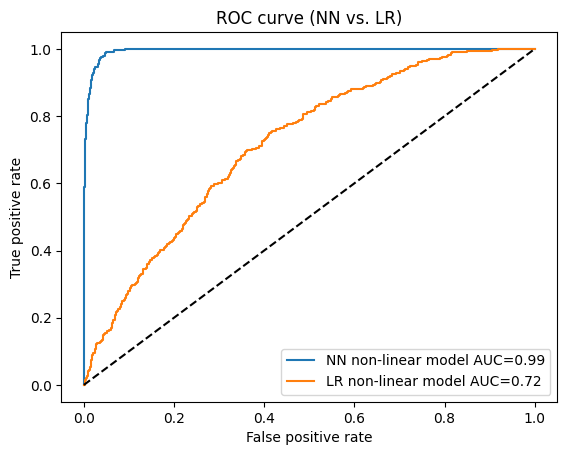

In [ ]:
# f) Plot the ROC curve and calculate the AUC

plt.plot(fpr_NN, tpr_NN, label='NN non-linear model AUC={:.2f}'.format(auc_NN))
plt.plot(fpr_LR_1, tpr_LR_1, label='LR non-linear model AUC={:.2f}'.format(auc_LR_1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (NN vs. LR)')
plt.legend(loc='best')

When you switch the labels in your target variable (for instance, changing 0s to 1s and 1s to 0s), the interpretation of "positive" and "negative" cases in your model is reversed. This inversion affects both the TPR and FPR:

The TPR (True Positive Rate) becomes the TNR (True Negative Rate) of the original labeling.
The FPR (False Positive Rate) becomes the FNR (False Negative Rate) of the original labeling.
As a result, the ROC curve will essentially be mirrored with respect to the diagonal, which can lead to a different AUC value. However, the AUC value under the new labeling will be complementary to the original AUC, adding up to 1. If the original AUC was 0.8, after switching the labels, the new AUC will be 0.2.

This change doesn't affect the discriminatory power of the model; it just changes the interpretation of the ROC curve and the AUC value based on the new labeling convention.

# Question 3

## Question 3a) & 3b)

Expected P&L if everybody (6000 people) gets a loan: -101420.98
95% VaR of the P&L if everybody (6000 people) gets a loan: 116025.00


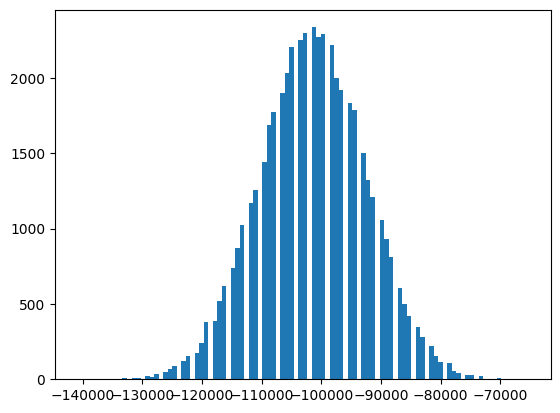

In [ ]:
# a) & b) Estimate P&L and 95%-VaR for different scenarios

from scipy.stats import norm
import matplotlib as mpl

portfolio_size = 6000
loan_amount = 1000
rate = 0.035

#simulate the defaults on the loan portfolio
defaults = np.float32(np.random.uniform(low=0., high=1., size=(portfolio_size, 50000)) < p_test_1[:portfolio_size, :])


#p&l for scenario 1 => everybody gets a loan
p_and_l_a = np.sum(loan_amount * (rate * (1. - defaults) - defaults), axis=0)

#histogramm for scenario 1
plt.figure(1)
plt.hist(p_and_l_a, bins=100)

print('Expected P&L if everybody (6000 people) gets a loan: {:.2f}'.format(np.mean(p_and_l_a)))
p_and_l_a = np.sort(p_and_l_a)
print('95% VaR of the P&L if everybody (6000 people) gets a loan: {:.2f}'.format(-p_and_l_a[2499]))

Expected P&L if only people with a lower then 5% default probability get a loan (Logistical Regression): 35544.94
95% VaR of the P&L if only people with a lower then 5% default probability get a loan (Logistical Regression): -24810.00
Expected P&L if only people with a lower then 5% default probability get a loan (Neural Networks): 182129.56
95% VaR of the P&L if only people with a lower then 5% default probability get a loan (Logistical Regression): -180665.00


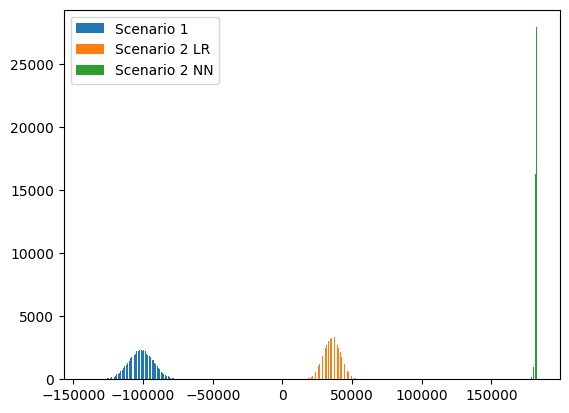

In [ ]:
#p&l for scenario 2 => Only people with a default probability of below 5% get a loan

p_and_l_b_LR = np.sum(loan_amount * (rate * (1. - defaults) - defaults) * np.float32(scores_LR_1[:portfolio_size, 1:2] < 0.05), axis=0)
p_and_l_b_NN = np.sum(loan_amount * (rate * (1. - defaults) - defaults) * np.float32(scores_NN[:portfolio_size, :] < 0.05), axis=0)

plt.figure(2)
plt.hist(p_and_l_a, bins=100, label='Scenario 1')
plt.hist(p_and_l_b_LR, bins=100, label='Scenario 2 LR')
plt.hist(p_and_l_b_NN, bins=10, label='Scenario 2 NN')
plt.legend()


print('Expected P&L if only people with a lower then 5% default probability get a loan (Logistical Regression): {:.2f}'.format(np.mean(p_and_l_b_LR)))
p_and_l_b_LR = np.sort(p_and_l_b_LR)
print('95% VaR of the P&L if only people with a lower then 5% default probability get a loan (Logistical Regression): {:.2f}'.format(-p_and_l_b_LR[2499]))

print('Expected P&L if only people with a lower then 5% default probability get a loan (Neural Networks): {:.2f}'.format(np.mean(p_and_l_b_NN)))
p_and_l_b_NN = np.sort(p_and_l_b_NN)
print('95% VaR of the P&L if only people with a lower then 5% default probability get a loan (Neural Networks): {:.2f}'.format(-p_and_l_b_NN[2499]))

